In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

df['species'] = df['target'].apply(lambda x: iris.target_names[x])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [132]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [133]:
df_tabela_portugues = [
	'comprimento_da_sepala(cm)',
	'largura_da_sepala(cm)',
	'comprimento_da_petala(cm)',
	'largura_da_petala(cm)',
	'target',
	'species'
]

df.columns = df_tabela_portugues

df

,comprimento_da_sepala(cm),largura_da_sepala(cm),comprimento_da_petala(cm),largura_da_petala(cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [134]:
df.isnull()

(df.isnull().sum() / len(df) * 100)

comprimento_da_sepala(cm)    0.0
largura_da_sepala(cm)        0.0
comprimento_da_petala(cm)    0.0
largura_da_petala(cm)        0.0
target                       0.0
species                      0.0
dtype: float64

# Originais

In [135]:
df_dados = df.copy()

lb = LabelEncoder()

df_dados

,comprimento_da_sepala(cm),largura_da_sepala(cm),comprimento_da_petala(cm),largura_da_petala(cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [141]:
df_sem_especies = df_dados.drop('species', axis=1)

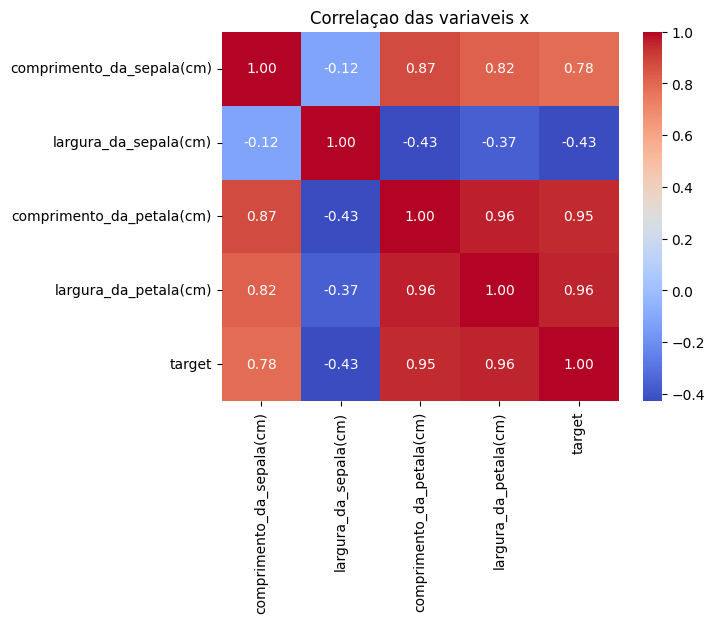

In [142]:
sns.heatmap(df_sem_especies.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlaçao das variaveis x")
plt.show()

In [143]:
correlacao= df_dados.corr(numeric_only=True)['target'].sort_values(ascending=False)

display(correlacao)

target                       1.000000
largura_da_petala(cm)        0.956547
comprimento_da_petala(cm)    0.949035
comprimento_da_sepala(cm)    0.782561
largura_da_sepala(cm)       -0.426658
Name: target, dtype: float64

In [144]:

variaveis_x = df_dados.drop(['target','species'], axis=1)

variavel_y = df_dados['target']

variaveis_x.head()

,comprimento_da_sepala(cm),largura_da_sepala(cm),comprimento_da_petala(cm),largura_da_petala(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [145]:
x_treino, x_teste, y_treino, y_teste = train_test_split(variaveis_x, variavel_y, test_size=0.3, random_state=30)

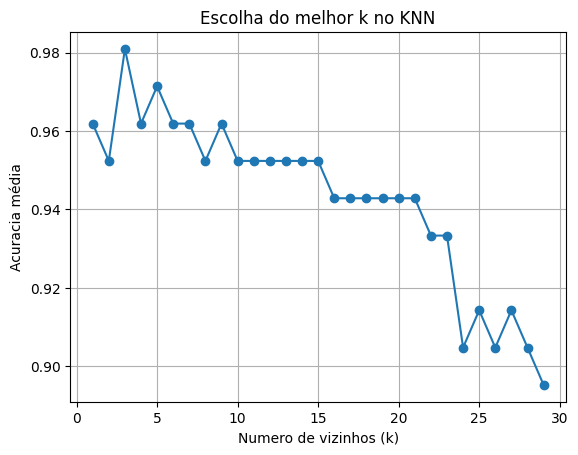

In [147]:
acuracia = []
k_values = range(1,30)

for k in k_values:
    modelo = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(modelo, x_treino, y_treino, cv=5, scoring='accuracy')
    acuracia.append(scores.mean())

plt.plot(k_values, acuracia, marker='o')
plt.xlabel('Numero de vizinhos (k)')
plt.ylabel('Acuracia média')
plt.title('Escolha do melhor k no KNN')
plt.grid(True)
plt.show()


In [148]:
mode = KNeighborsClassifier()

mode.fit(x_treino, y_treino)

KNeighborsClassifier()

In [149]:
resultado_teste = mode.predict(x_teste)

In [150]:
score = accuracy_score(y_teste, resultado_teste)

score

0.9333333333333333

In [151]:
for comparacao in zip(y_teste, resultado_teste):
    print(comparacao)

(0, np.int64(0))
(0, np.int64(0))
(0, np.int64(0))
(2, np.int64(2))
(1, np.int64(1))
(1, np.int64(1))
(2, np.int64(2))
(2, np.int64(2))
(1, np.int64(1))
(2, np.int64(2))
(0, np.int64(0))
(2, np.int64(2))
(1, np.int64(1))
(1, np.int64(1))
(0, np.int64(0))
(1, np.int64(1))
(0, np.int64(0))
(0, np.int64(0))
(0, np.int64(0))
(1, np.int64(2))
(2, np.int64(1))
(0, np.int64(0))
(0, np.int64(0))
(0, np.int64(0))
(2, np.int64(2))
(2, np.int64(2))
(1, np.int64(2))
(2, np.int64(2))
(0, np.int64(0))
(1, np.int64(1))
(2, np.int64(2))
(1, np.int64(1))
(2, np.int64(2))
(2, np.int64(2))
(2, np.int64(2))
(2, np.int64(2))
(1, np.int64(1))
(2, np.int64(2))
(1, np.int64(1))
(2, np.int64(2))
(2, np.int64(2))
(2, np.int64(2))
(0, np.int64(0))
(1, np.int64(1))
(2, np.int64(2))
